In [17]:
"""Sparsity analysis for the compression of the data."""

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

value_to_average = 50

# Compression sample
points = [(100, 214), (10, 21.9), (5, 11), (1, 2.3), (0.5, 1.2), (0.1, 0.3)]
# points = [
#     (5, 5.9),
#     (10, 10.1),
#     (15, 14.4),
#     (20, 18.7),
#     (25, 23.0),
#     (30, 27.3),
#     (35, 31.6),
#     (40, 35.9),
#     (45, 40.2),
#     (50, 44.5),
# ]

In [18]:
def determitate_label(column: str) -> str:
    """
    function used to determinate the label of the column, to avoid long names
    """
    if "zerofl" in column or "_ZERO" in column:
        return "ZeroFL"
        if "lda1000.0" in column:
            return "ZeroFL_lda1000.0"
        elif "lda1.0" in column:
            return "ZeroFL_lda1.0"
        elif "lda0.1" in column:
            return "ZeroFL_lda0.1"
    if "powerprop-a1.0-s0.9" in column or "_RESNET18-a1.0-s0.9" in column:
        return "Top-K"
        if "lda1000.0" in column:
            return "Resnet18_topk_lda1000.0"
        elif "lda1.0" in column:
            return "Resnet18_topk_lda1.0"
        elif "lda0.1" in column:
            return "Resnet18_topk_lda0.1"
    if "powerprop-a1.0-s0.0" in column or "_RESNET18-a1.0-s0.0" in column:
        return "Dense"
        if "lda1000.0" in column:
            return "Resnet18_lda1000.0"
        elif "lda1.0" in column:
            return "Resnet18_lda1.0"
        elif "lda0.1" in column:
            return "Resnet18_lda0.1"
    if "power_swat" in column or "_PPSWAT" in column:
        return "SparseFedPP"
        if "lda1000.0" in column:
            return "PowerSwat_lda1000.0"
        elif "lda1.0" in column:
            return "PowerSwat_lda1.0"
        elif "lda0.1" in column:
            return "PowerSwat_lda0.1"
    if "resnet" in column:
        return "Dense"
        if "lda1000.0" in column:
            return "Resnet18_lda1000.0"
        elif "lda1.0" in column:
            return "Resnet18_lda1.0"
        elif "lda0.1" in column:
            return "Resnet18_lda0.1"


# def determitate_label(column: str) -> str:
#     if "zerofl" in column:
#         if "lda1000.0" in column:
#             return "ZeroFL_lda1000.0"
#         elif "lda1.0" in column:
#             return "ZeroFL_lda1.0"
#         elif "lda0.1" in column:
#             return "ZeroFL_lda0.1"
#     if "powerprop-a1.0-s0.9" in column:
#         if "lda1000.0" in column:
#             return "Resnet18_topk_lda1000.0"
#         elif "lda1.0" in column:
#             return "Resnet18_topk_lda1.0"
#         elif "lda0.1" in column:
#             return "Resnet18_topk_lda0.1"
#     if "powerprop-a1.0-s0.0" in column:
#         if "lda1000.0" in column:
#             return "Resnet18_lda1000.0"
#         elif "lda1.0" in column:
#             return "Resnet18_lda1.0"
#         elif "lda0.1" in column:
#             return "Resnet18_lda0.1"
#     if "power_swat" in column:
#         if "lda1000.0" in column:
#             return "PowerSwat_lda1000.0"
#         elif "lda1.0" in column:
#             return "PowerSwat_lda1.0"
#         elif "lda0.1" in column:
#             return "PowerSwat_lda0.1"


# for column in data_columns.columns:
#     print(f"Column: {determitate_label(column)} -> {column}")

In [19]:
# file_path = 'sparsity_consumption_acc.csv'  # Update with your actual file path
file_path = "sparsity_consumption_acc2.csv"  # Update with your actual file path

# Read the first row to get the labels
with open(file_path) as f:
    labels = f.readline().strip().split(",")

# Read the CSV file starting from the second row
data_acc = pd.read_csv(file_path, header=None, skiprows=1, names=labels)
# Convert all columns to numeric, forcing errors to NaN
data_acc = data_acc.apply(pd.to_numeric, errors="coerce")

# Extract the data columns (excluding the first index column)
data_columns = data_acc.iloc[:, 1:]

# Define a color palette
# palette = sns.color_palette("Set2", len(data_columns.columns))

In [31]:
# Assuming data_columns is a DataFrame and palette is defined
# column_colors = dict(zip(data_columns.columns, palette))
avg_last_10 = {}
threshold = {}
threshold_round = {}
# Create a line plot for each column using the assigned color
plt.figure(figsize=(10, 5))

# print(f"Columns: {data_columns.columns}")

for column in data_columns.columns:
    if "MAX" not in column and "MIN" not in column and "lda1000.0" in column:
        plt.plot(
            data_acc[column],
            label=determitate_label(column),
            # color=column_colors[column],
        )

        # Calculate the average of the last 10 values
        avg_last_10[determitate_label(column)] = data_acc[column][
            -value_to_average:
        ].mean()

        # Determine the threshold as 99% of this average
        threshold[determitate_label(column)] = (
            0.99 * avg_last_10[determitate_label(column)]
        )

        # Find the index where the value first reaches or exceeds this threshold
        for idx in range(len(data_acc[column])):
            if data_acc[column][idx] >= threshold[determitate_label(column)]:
                threshold_round[determitate_label(column)] = idx
                print(f"threshold_round: {threshold_round[determitate_label(column)]}")
                plt.plot(idx, data_acc[column][idx], marker="o")
                break

# plt.axhline(y=ZeroFL, color="grey", linestyle="--", label="Target Sparsity")
# plt.ylim(40, 100)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Columns: Index(['"zerofl-a1.0-s0.9-cifar100_lda1000.0-FedAvgNZ-e1-lr0.5 - sparsity"',
       '"zerofl-a1.0-s0.9-cifar100_lda1000.0-FedAvgNZ-e1-lr0.5 - sparsity__MIN"',
       '"zerofl-a1.0-s0.9-cifar100_lda1000.0-FedAvgNZ-e1-lr0.5 - sparsity__MAX"',
       '"zerofl-a1.0-s0.9-cifar100_lda1.0-FedAvgNZ-e1-lr0.5 - sparsity"',
       '"zerofl-a1.0-s0.9-cifar100_lda1.0-FedAvgNZ-e1-lr0.5 - sparsity__MIN"',
       '"zerofl-a1.0-s0.9-cifar100_lda1.0-FedAvgNZ-e1-lr0.5 - sparsity__MAX"',
       '"zerofl-a1.0-s0.9-cifar100_lda0.1-FedAvgNZ-e1-lr0.5 - sparsity"',
       '"zerofl-a1.0-s0.9-cifar100_lda0.1-FedAvgNZ-e1-lr0.5 - sparsity__MIN"',
       '"zerofl-a1.0-s0.9-cifar100_lda0.1-FedAvgNZ-e1-lr0.5 - sparsity__MAX"',
       '"power_swat-a1.25-s0.9-cifar100_lda1000.0-FedAvg-e1-lr0.5 - sparsity"',
       '"power_swat-a1.25-s0.9-cifar100_lda1000.0-FedAvg-e1-lr0.5 - sparsity__MIN"',
       '"power_swat-a1.25-s0.9-cifar100_lda1000.0-FedAvg-e1-lr0.5 - sparsity__MAX"',
       '"powerprop-a1.0-s0.9-cifar10

KeyError: '"zerofl-a1.0-s0.9-cifar100_lda1000.0-FedAvgNZ-e1-lr0.5 - sparsity"'

<Figure size 1000x500 with 0 Axes>

Load sparsity data from file

In [21]:
# Define the path to your CSV file
# file_path = 'sparsity_consumption.csv'  # Update with your actual file path
file_path = "sparsity_consumption2.csv"  # Update with your actual file path

# Read the first row to get the labels
with open(file_path) as f:
    labels = f.readline().strip().split(",")

# Read the CSV file starting from the second row
data = pd.read_csv(file_path, header=None, skiprows=1, names=labels)

# Display the first few rows of the data to understand its structure
# print(data.head())
# print(data.head(1))

In [22]:
# Convert all columns to numeric, forcing errors to NaN
data = data.apply(pd.to_numeric, errors="coerce")

# Extract the data columns (excluding the first index column)
data_columns = data.iloc[:, 1:]

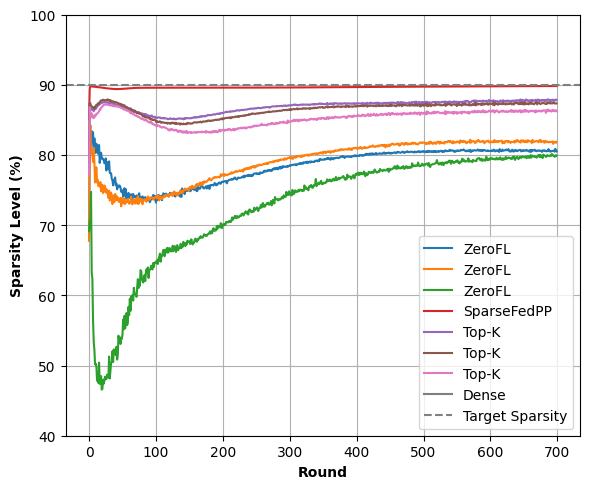

In [23]:
ZeroFL = 90
# Plot Resnet18 threshold line


# Define a color palette
# palette = sns.color_palette("Set2", len(data_columns.columns))

# Create a dictionary to map each column name to a color
# column_colors = dict(zip(data_columns.columns, palette))

# Create a line plot for each column using the assigned color
plt.figure(figsize=(6, 5))
for column in data_columns.columns:
    if "MAX" not in column and "MIN" not in column:
        plt.plot(
            data[column],
            label=determitate_label(column),  # , color=column_colors[column]
        )
plt.axhline(y=ZeroFL, color="grey", linestyle="--", label="Target Sparsity")
plt.ylim(40, 100)
plt.legend()
plt.xlabel("Round", fontweight="bold")  # Make y-axis label bold
plt.ylabel("Sparsity Level (%)", fontweight="bold")  # Make x-axis label bold
plt.grid(True)
plt.tight_layout()
plt.show()

# # Create dedicated plots for each run
# for column in data_columns.columns:
#     if 'MAX' not in column and 'MIN' not in column:
#         plt.figure(figsize=(5, 3))
#         plt.plot(
#             data[column],
#             label=determitate_label(column),
#             color=column_colors[column]
#              )
#         plt.ylim(0, 100)  # Set y-axis limits from 0 to 100
#         plt.legend()
#         plt.grid(True)
#         plt.tight_layout()
#         plt.axhline(
#             y=ZeroFL, color="grey", linestyle="--", label="Target Sparsity"
#         )
#         plt.show()

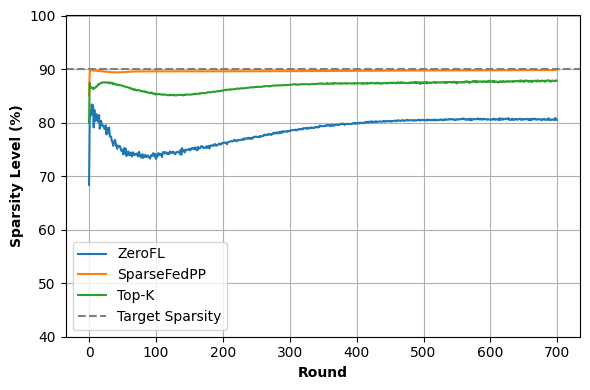

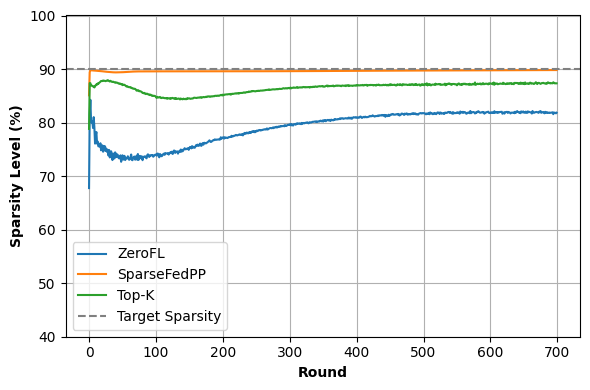

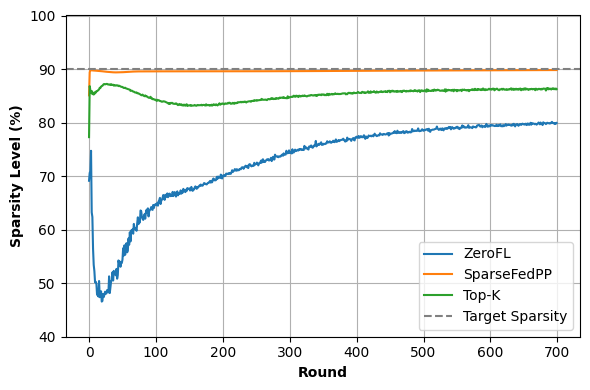

In [30]:
def truncate_string(value):
    # function to truncate the string as soon as find '_lda'
    return value.split("_lda")[0]


# lda1000.0
plt.figure(figsize=(6, 4))
for column in data_columns.columns:
    if (
        "MAX" not in column
        and "MIN" not in column
        and "s0.0" not in column
        and ("lda1000.0" in column or "swat" in column)
    ):
        plt.plot(
            data[column],
            label=truncate_string(
                determitate_label(column)
            ),  # , color=column_colors[column]
        )
plt.axhline(y=ZeroFL, color="grey", linestyle="--", label="Target Sparsity")
plt.ylim(40, 100)
# plt.title("lda0.1")
plt.legend()
plt.xlabel("Round", fontweight="bold")  # Make y-axis label bold
plt.ylabel("Sparsity Level (%)", fontweight="bold")  # Make x-axis label bold
plt.grid(True)
plt.tight_layout()
plt.show()

# lda1.0
plt.figure(figsize=(6, 4))
for column in data_columns.columns:
    if (
        "MAX" not in column
        and "MIN" not in column
        and ("lda1.0" in column or "swat" in column)
    ):
        plt.plot(
            data[column],
            label=truncate_string(
                determitate_label(column)
            ),  # , color=column_colors[column]
        )
plt.axhline(y=ZeroFL, color="grey", linestyle="--", label="Target Sparsity")
plt.ylim(40, 100)
# plt.title("lda0.1")
plt.legend()
plt.xlabel("Round", fontweight="bold")  # Make y-axis label bold
plt.ylabel("Sparsity Level (%)", fontweight="bold")  # Make x-axis label bold
plt.grid(True)
plt.tight_layout()
plt.show()


# lda0.1
plt.figure(figsize=(6, 4))
for column in data_columns.columns:
    if (
        "MAX" not in column
        and "MIN" not in column
        and ("lda0.1" in column or "swat" in column)
    ):
        plt.plot(
            data[column],
            label=truncate_string(
                determitate_label(column)
            ),  # , color=column_colors[column]
        )
plt.axhline(y=ZeroFL, color="grey", linestyle="--", label="Target Sparsity")
plt.ylim(40, 100)
# plt.title("lda0.1")
plt.legend()
plt.xlabel("Round", fontweight="bold")  # Make y-axis label bold
plt.ylabel("Sparsity Level (%)", fontweight="bold")  # Make x-axis label bold
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot the memory consumption
Write a function that get an equation trhough polynomial of order n-1 through all the points., always positive, from this points: 
(1, 214)
(0.1, 21.9)
(0.05, 11)
(0.01, 2.3)
(0.005, 1.2)
(0.001, 0.3)
that plot the point and the function in a graph.
show also the value for y=43

In [25]:
# points = [(100, 214), (10, 21.9), (5, 11), (1, 2.3), (0.5, 1.2), (0.1, 0.3)]
# points = [(5, 5.9), (10, 10.1), (15, 14.4), (20, 18.7), (25, 23.0), (30, 27.3),
# (35, 31.6), (40, 35.9), (45, 40.2), (50, 44.5)]
n = 4
x = [p[0] for p in points]
y = [p[1] for p in points]
coefficients = np.polyfit(x, y, n - 1)
polynomial = np.poly1d(coefficients)


def plot_polynomial():
    print(f"Polynomial: {polynomial(0.2)}")
    x_values = np.linspace(min(x), max(x), 100)
    y_values = polynomial(x_values)
    plt.plot(x_values, y_values, label="Polynomial Fit")
    plt.scatter(x, y, color="red", label="Data Points")
    plt.axhline(y=43, color="green", linestyle="--", label="y=43")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.title("Polynomial Fit")
    plt.legend()
    plt.grid(True)
    plt.show()


# plot_polynomial()


def get_dimension(sparsity):
    # print(f'value: {sparsity}, the type is {type(sparsity)}')
    if not isinstance(sparsity, float):
        if isinstance(sparsity, int):
            sparsity = float(sparsity)
        else:
            return sparsity
    sparsity = 100 - sparsity
    # if sparsity > 20: return 43.7
    # print(f'Sparsity: {sparsity} -> {polynomial(sparsity)}')
    memory = polynomial(sparsity)
    if memory > 43.7:
        return 43.7
    return memory


print(f"90.0 -> {get_dimension(90.0)}")
print(f"0.0 -> {get_dimension(0.0)}")

90.0 -> 21.898346591078706
0.0 -> 43.7


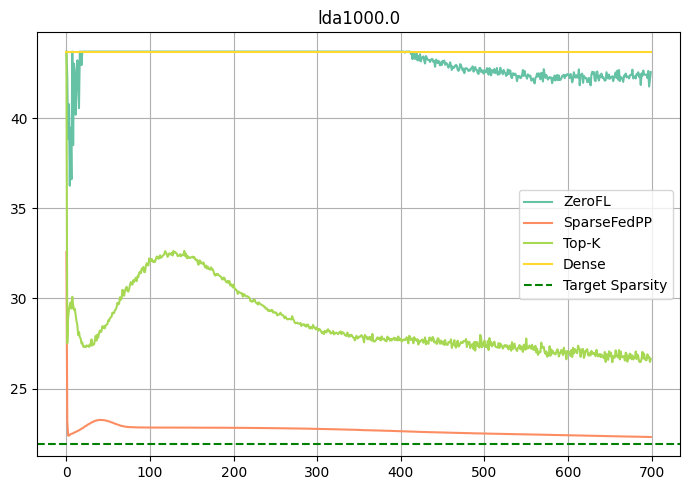

In [26]:
# lda1000.0
plt.figure(figsize=(7, 5))
for column in data_columns.columns:
    if "MAX" not in column and "MIN" not in column and "lda1000.0" in column:
        processed_data = data[column].apply(get_dimension)
        plt.plot(
            (processed_data),
            label=determitate_label(column),
            color=column_colors[column],
        )

plt.title("lda1000.0")
plt.axhline(
    y=get_dimension(90.0), color="green", linestyle="--", label="Target Sparsity"
)

# plt.ylim(1, 50)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Column: "zerofl-a1.0-s0.9-cifar100_lda1000.0-FedAvgNZ-e1-lr0.5 - sparsity" -> 543
Column: "power_swat-a1.25-s0.9-cifar100_lda1000.0-FedAvg-e1-lr0.5 - sparsity" -> 166
Column: "powerprop-a1.0-s0.9-cifar100_lda1000.0-FedAvg-e1-lr0.5 - sparsity" -> 277
Column: "powerprop-a1.0-s0.0-cifar100_lda1000.0-FedAvg-e1-lr0.5 - sparsity" -> 183


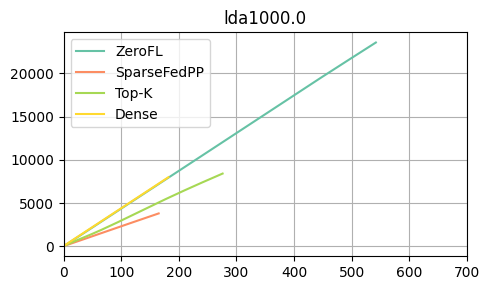

Column: ZeroFL -> 23570.96292802747
Column: SparseFedPP -> 3809.0680574091343
Column: Top-K -> 8418.620891609764
Column: Dense -> 7997.099999999977


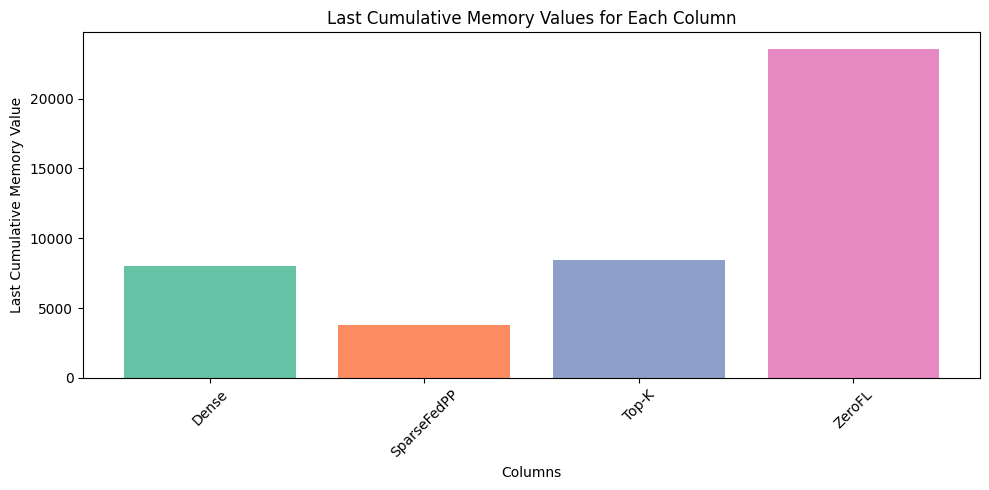

In [27]:
# lda1000.0
from collections import OrderedDict


cumulative_memory = {}
plt.figure(figsize=(5, 3))
for column in data_columns.columns:
    processed_data[column] = data[column].apply(get_dimension)
    # cumulative_memory = [
    #     sum(processed_data[column][: i + 1]) for i in range(len(processed_data))
    # ]
    if (
        "MAX" not in column
        and "MIN" not in column
        and ("lda1000.0" in column or "swat" in column)
    ):
        cumulative_memory[determitate_label(column)] = [
            sum(processed_data[column][: i + 1])
            for i in range(threshold_round[determitate_label(column)])
        ]
        print(f"Column: {column} -> {threshold_round[determitate_label(column)]}")
        plt.plot(
            (cumulative_memory[determitate_label(column)]),
            label=determitate_label(column),
            color=column_colors[column],
        )

plt.title("lda1000.0")
# plt.axhline(y=get_dimension(90.0), color='green', linestyle='--',
# label='Target Sparsity')
# plt.ylim(10, 30000)
plt.xlim(0, 700)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

for column in data_columns.columns:
    if "MAX" not in column and "MIN" not in column and "lda1000.0" in column:
        print(
            f"Column: {determitate_label(column)} ->"
            f" {cumulative_memory[determitate_label(column)][-1]}"
        )

# Gather the last values for the bar plot
last_values = {}
for column in data_columns.columns:
    if "MAX" not in column and "MIN" not in column and "lda1000.0" in column:
        label = determitate_label(column)
        last_values[label] = cumulative_memory[label][-1]

# last_values['Resnet18_dense'] = 43.7 *
# Create a bar plot of the last values
last_values = OrderedDict(sorted(last_values.items()))
plt.figure(figsize=(10, 5))
labels = list(last_values.keys())
values = list(last_values.values())
plt.bar(labels, values, color=palette)
plt.xlabel("Columns")
plt.ylabel("Last Cumulative Memory Value")
plt.title("Last Cumulative Memory Values for Each Column")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()